## Исследование данных о российском кинопрокате



Заказчик нашего исследования — Министерство культуры Российской Федерации. 
Нам предстоит изучить рынок российского кинопроката и выявить текущие тренды. Отдельно проанализировать фильмы, которые получили государственную поддержку. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd #импортируем нужные библиотеки
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#загрузим первый датасет
try:
    df = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')


In [3]:
df.head(10) #посмотрим на данные


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
df.info() #посмотрим на иформацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
#загрузим второй датасет
try:
    df2 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
#df2 = pd.read_csv()

In [6]:
df2.head(10) #посмотрим на данные

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [7]:
df2.info() #посмотрим на иформацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Наши данные мы будем объединять по столбцу 'puNumber', в df тип данных в этом столбце object, а в df2 - int64. Нам нужно привести их к одному типу - int64. 

In [8]:
df['puNumber'].replace('нет', np.nan, inplace=True) #заменим все "нет" на пропуски
df['puNumber'] = df['puNumber'].astype(float).astype('Int64')
#df2['puNumber'] = df2['puNumber'].astype('Int64')
df2['puNumber'] = pd.to_numeric(df2['puNumber'], errors='coerce').convert_dtypes()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: I

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   Int64  
 1   box_office  3158 non-null   float64
dtypes: Int64(1), float64(1)
memory usage: 52.6 KB


In [11]:
data = df.merge(df2, on='puNumber', how='left') #теперь объединим таблицы - к таблице df прибавить данные из даблицы df2 по столбцу puNumber. 

In [12]:
print(f'Размер набора данных df:{df.shape}')
print(f'Размер набора данных df2:{df2.shape}')
print(f'Размер набора данных data:{data.shape}')

Размер набора данных df:(7486, 15)
Размер набора данных df2:(3158, 2)
Размер набора данных data:(7486, 16)


Объеденены наборы данных df и df2 в data, потерь в данных нет.

In [13]:
data # посмотрим на объединенный датафрейм

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Шаг 2. Предобработка данных

In [14]:
data = data.rename(columns={'puNumber':'pu_number'}) #приведем название столбца к змеиному регистру

Перед началом предобработки зафиксируем форму нашего датафрейма, чтобы после обработки оценить результаты.

In [15]:
shape = data.shape
print('DataFrame Shape :', shape)
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])

DataFrame Shape : (7486, 16)
Number of rows : 7486
Number of columns : 16


#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7485 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [17]:
data['ratings'].unique() #посмотрим какие значения имеет столбец 'ratings'

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Среди числовых значений мы встречаем проценты. Рейтинг на кинопоиске проставляется в диапазоне от 1 до 10, поэтому нам нужно перевести проценты (от рейтинга 10) в числовые значения, чтобы привести все значения к общему формату и успешно изменить у них тип данных на float.

In [18]:
data['ratings'] = data['ratings'].str.replace('%', '') #сначала заменим знак проценка на пробел
data['ratings'] = data['ratings'].astype(float) #затем изменим тип данных

In [19]:
data['ratings'] =(data['ratings'] / 10). where(data['ratings'] > 10, data['ratings'] ) #теперь все данные, которые раньше были процентами, а теперь просто числа больше 10 мы переведем в числовые значения рейтинга.

In [20]:
data['ratings'].unique() #посмотрим, что получилось все хорошо.

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Изменим тип данных в столбце 'show_start_date' на дату

In [21]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT')

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [22]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [23]:
data.isna().sum() #посмотрим сколько у нас пропусков

title                       0
pu_number                   1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Начем по порядку. В столбце 'pu_number' 1 пропуск, оставим его как есть, номер прокатного удостоверения нам не известен, можно заменить его на 0, но нет необходимости.

В столбце 'film_studio' 18 пропусков, это немного, предлагаю заполнить эти пропуски значениями 'студия не указана'

In [24]:
data['film_studio']=data['film_studio'].fillna('студия не указана')

В столбце 'production_country' всего 2 пропуска, заполним их аналогично на значение 'страна не указана'

In [25]:
data['production_country']=data['production_country'].fillna('стана не указана')

В столбце 'director' всего 9 пропусков, заполним их на значение 'директор не указан'

In [26]:
data['director']=data['director'].fillna('директор не указан')

В столбце 'producer' довольно-таки много пропусков (568), какими точно значениями они должны быть заполнены нам не узнать, не будем же мы искать информацию о каждом фильме, поэтому заполним пропуски значением 'продюссер не указан'

In [27]:
data['producer']=data['producer'].fillna('продюссер не указан')

Видимо столбцы 'refundable_support', 'nonrefundable_support', 'financing_source' относятся к фильмам с господдержкой, пропуски в них означают отсутствие господдержки, поэтому пропуски в 'refundable_support', 'nonrefundable_support' заполним нулями а в 'financing_source' на 'нет'.

In [28]:
data['refundable_support']=data['refundable_support'].fillna(0)
data['nonrefundable_support']=data['nonrefundable_support'].fillna(0)
data['financing_source']=data['financing_source'].fillna('нет')

Пропуски в столбце 'ratings' мы, к сожалению, никак не можем заполнить, нам не известен рейтинг фильмов, а пропусков довольно-таки много, оставим как есть.

В столбце 'genres' заполним пропуски на 'жанр не указан'

In [29]:
data['genres']=data['genres'].fillna('жанр не указан')

Пропуски в столбце 'box_office' мы тоже не можем заполнить сами, нам не известна сумма сборов, а пропусков очень много, оставим как есть.

In [30]:
data.isna().sum() #посмотрим на иформацию о пропуска после их обработки

title                       0
pu_number                   1
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                   7154
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [31]:
data.duplicated().sum() #явных дубликатов в данных нет

0

Поработаем с неявными дубликатами. Они возможны в столбце 'title'. Посмотрим на его уникальные значения

In [32]:
data['title'].nunique() #уникальных значений названия фильмом меньше, чем кол-ва данных, значит если дубликаты

6772

In [33]:
data[data['title'].duplicated()] #посмотрим датиасет из дубликатов названий фильмов

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"триллер,криминал,детектив",NaN


In [34]:
data.query('title == "Особо опасен"')#сделаем срез данных по фильму 'Особо опасен' и посмотрим на него

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN


Мы видим, что у нас 3 строки с данными о фильме 'Особо опасен'. Все столбцы одинаковые кроме номера прокатного удостоверения и даты премьеры. 

In [35]:
data.query('title == "Алекс и Эмма"')#сделаем срез данных по фильму 'Алекс и Эмма' и посмотрим на него

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
40,Алекс и Эмма,221005015,2015-02-25 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,6.4,"мелодрама,комедия",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,6.4,"мелодрама,комедия",NaN
4581,Алекс и Эмма,221156910,2010-12-17 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,6.4,"мелодрама,комедия",NaN


Мы видим, что у нас 3 строки с данными о фильме 'Алекс и Эмма'. Все столбцы одинаковые кроме номера прокатного удостоверения и даты премьеры. 

In [36]:
data.query('title == "Зверь"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5988,Зверь,121013518,2018-07-05 12:00:00+00:00,Художественный,"Агиле Филмз, Бэ Эф И, Фильм Фонд, Филм Фо, Стр...",Великобритания,Майкл Пирс,"Кристиан Броуди, Лорен Дарк, Ивана МакКиннон",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.5,"триллер,драма",5544612.00
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.5,"триллер,драма",175003.51


А вот у фильма 'Зверь' почти все столбцы разные, кроме названия, видимо это разные фильмы с одинаковым названием. 

In [37]:
data.query('title == "Вторжение"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5430,Вторжение,124002417,2017-08-01 12:00:00+00:00,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,продюссер не указан,«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет,5.7,"фантастика,боевик",NaN
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN


Так же видим два разных фильма с одинаковым названием "Вторжение"

Можем сделать вывод, что дубликаты в столбце 'title' обусловлены совпадениями названий фильмов либо выходом в повторный прокат одного фильма. 

In [38]:
data[data['pu_number'].duplicated()] #посмотрим на дубликаты в 'pu_number'

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,6.8,"комедия,криминал",NaN


In [39]:
data.query('pu_number == 221154310') #посмотрим что у нас хранится по прокатным номером 221154310


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.6,"драма,мелодрама,история",NaN


Видим, что с одним прокатным номером разные фильм, которые вышли в прокат в один день, видимо тут какая-то техническая ошибка(человеческий фактор). Присвоим фильму 'Как жениться и остаться холостым' свободный прокатный номер.

In [40]:
data['pu_number'].max()#посмотрим какой максимальный номер занят

231001111

In [41]:
data.loc[(data['title'] == 'Как жениться и остаться холостым') & (data['pu_number'] == 221154310), 'pu_number'] = 231001112

In [42]:
data[data['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,6.8,"комедия,криминал",NaN


In [43]:
data.query('pu_number == 221054410')#посмотрим что у нас хранится по прокатным номером 221054410

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,6.8,"комедия,криминал",NaN


У нас осталось 2 дубликата с одинаков прокатным номером, 'погуглив' информацию о фильме 'Анализируй это!', я сделала вывод, что скорее всего данные о нем редактировали, а старые не удалили, верные данные а стоке 5067, поэтому удалим строку 5068.

In [44]:
data.drop(labels = [5068],axis = 0, inplace = True)

In [45]:
data.query('pu_number == 221054410')


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.4,"комедия,криминал",NaN


Посмотрим на столбец 'production_country'.

In [46]:
data['production_country'].value_counts().count()

951

In [47]:
data['production_country'].value_counts().sort_index(ascending=False).tail(30)

Аргентина - Мексика - Бразилия - Франция - США     1
Аргентина - Испания - Уругвай                      1
Аргентина - Испания                                6
Аргентина - Бразилия                               2
Аргентина                                          7
Азербайджан-Россия                                 1
Австрия-Франция-Германия                           1
Австрия-Германия-Франция                           1
Австрия, Великобритания, Германия                  1
Австрия - Люксембург                               1
Австрия - Германия - Франция                       2
Австрия - Германия                                 2
Австрия                                            7
Австралия-Турция-США                               1
Австралия-США                                      1
Австралия-Ирландия                                 1
Австралия-Великобритания                           1
Австралия, США                                     3
Австралия, Канада                             

Мы видим, что страны разделяют при перечислении разными знаками и разным количеством пробелов. Попробуем привести к единому формату и тем самым избавиться от неявных дубликатов.

In [48]:
data['production_country'] = data['production_country'].str.replace('-', ', ')#заменим тире на запятые

In [49]:
data['production_country'] = data['production_country'].replace(r'\s+','',regex=True)#удалим пробелы

In [50]:
data['production_country'].value_counts().sort_index(ascending=False).tail(30)

Бельгия                                                  8
Армения,Россия                                           1
Армения,Казахстан                                        1
Армения,Германия                                         1
Армения                                                  9
Аргентина,Франция,Испания                                1
Аргентина,Уругвай,Россия,Германия,Франция,Нидерланды     1
Аргентина,Мексика,Бразилия,Франция,США                   1
Аргентина,Испания,Уругвай                                1
Аргентина,Испания                                        8
Аргентина,Бразилия                                       2
Аргентина                                                7
Азербайджан,Россия                                       1
Австрия,Франция,Германия                                 1
Австрия,Люксембург                                       1
Австрия,Германия,Франция                                 3
Австрия,Германия                                        

In [51]:
data['production_country'].value_counts().count()

813

После нашей обработки осталось 813 значений вместо 951, неявные дубликаты ушли.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [52]:
data['type'].value_counts() #посмотрим на значения столбца type

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

Видно, что в некоторых случаях есть лишние пробелы впереди строки,а может и в конце, удалим их

In [53]:
data['type']=data['type'].str.strip()

In [54]:
data['type'].value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Посмотрим на столбец genres, попробуем с ним поработать

In [55]:
data['genres'].value_counts()

жанр не указан                   976
драма                            476
комедия                          352
мелодрама,комедия                222
драма,мелодрама,комедия          189
                                ... 
мюзикл,комедия,мелодрама           1
боевик,драма,триллер               1
комедия,фэнтези,криминал           1
приключения,триллер,биография      1
триллер,ужасы,мелодрама            1
Name: genres, Length: 743, dtype: int64

In [56]:
data['genres']=data['genres'].str.strip()
data['genres'] = data['genres'].str.replace('-', ', ')

In [57]:
data['genres'].value_counts()

жанр не указан               976
драма                        476
комедия                      352
мелодрама,комедия            222
драма,мелодрама,комедия      189
                            ... 
мелодрама,музыка,драма         1
криминал,боевик,комедия        1
ужасы,приключения              1
ужасы,триллер,мелодрама        1
короткометражка,мелодрама      1
Name: genres, Length: 743, dtype: int64

В столбце genres ничего не изменилось, ну что ж, значит оставим как есть.

Посмотрим на значения столбца 'age_restriction'

In [58]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Тут все в порядке, неявных дубликатов нет.

Посмотрим на значения столбца 'film_studio'

In [59]:
data['film_studio'].sort_values()

7291                                      АНО "Кинофорум"
2768      Ауматик Интертейнмент, Блюмхаус Продакшнз и др.
5836     ЗАО "Кинокомпания ФаворитФильм" по заказу ООО...
4639     Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...
4513     Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...
                              ...                        
4441                                    студия не указана
6498                                    студия не указана
6499                                    студия не указана
647                                       юФилм, Твинпикс
5223                                      юФилм, Твинпикс
Name: film_studio, Length: 7485, dtype: object

In [60]:
data['film_studio'].nunique() #посмотрим сколько уникальных значений у столбца 

5490

In [61]:
data['film_studio']=data['film_studio'].str.strip()#удалим все пробелы, которые встречаются в начале и в конце строки


In [62]:
data['film_studio'].nunique()

5462

Уникальных значений столо меньше на 28.

Посмотрим на значения столбца 'director'

In [63]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [64]:
data['director'].nunique()

4811

In [65]:
data['director']=data['director'].str.strip()

In [66]:
data['director'].nunique()

4801

Количество уникальный значений уменьшилось на 10

Посмотрим на значения столбца 'producer'

In [67]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'продюссер не указан',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [68]:
data['producer'].nunique()

5349

In [69]:
data['producer']=data['producer'].str.strip()

In [70]:
data['producer'].nunique()

5334

Количество уникальный значений уменьшилось на 15

Посмотрим на значения столбца 'title'

In [71]:
data['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [72]:
data['title'].nunique()

6771

In [73]:
data['title']=data['title'].str.strip()

In [74]:
data['title'].nunique()

6771

Ничего не изменилось

Проблема почти всех категориальных столбцов в том, что данные туда вносились в произвольном формате,в одной строке перечислено несколько значений, много разных знаков. Такие данные трудно обработать, чтобы выявить неявные дубликаты. Получается, что у нас очень много уникальных значений, которые наверняка содержат достаточно неявных дубликатов, которые нам трудно выявить.

Проверим, как изменился размер наших данных после их обработки

In [75]:
shape_after = data.shape #создадим новую переменную с размером датафрейма после предобработки
print('DataFrame Shape :', shape,shape_after)
print('Number of rows :', shape[0],shape_after[0],shape_after[0]/shape[0] ) #посчитаем долю от изначального количества строк датафрейма
print('Number of columns :', shape[1],shape_after[1],shape_after[1]/shape[1])#посчитаем долю от изначального количества столбцов датафрейма

DataFrame Shape : (7486, 16) (7485, 16)
Number of rows : 7486 7485 0.9998664173123163
Number of columns : 16 16 1.0


Отличный результат, мы (намеренно) потеряли только одну строку.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [76]:
data.tail(30)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09
7457,Шарнохой - жёлтый пёс,111021819,2019-12-12 12:00:00+00:00,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,NaN,жанр не указан,1.295000e+05
7458,Курьер,121037019,2019-12-12 12:00:00+00:00,Художественный,"Роллеркоастер Энджел Продакшнз, Сигнича Филмз","Великобритания,США",Закари Адлер,"Джеймс Эдвард Баркер, Марк Голдберг, Эндрю Пре...",«18+» - запрещено для детей,0.0,0.0,NaN,нет,8.0,"драма,мелодрама,комедия",4.540376e+06
7459,Эрмитаж. Сила искусства,126007819,2019-12-11 12:00:00+00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Микеле Малли,"Диди Ньокки, Франко Ди Сарро",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,NaN,жанр не указан,1.032822e+06
7460,Школа номер один,113001619,2019-12-16 12:00:00+00:00,Научно-популярный,"АНО ""РИД ""Новая газета""",Россия,Вадих Эль Хайек,"О.Боброва, Д.Муратов",«18+» - запрещено для детей,0.0,0.0,NaN,нет,4.9,комедия,NaN
7461,Тайна Мосли,124010419,2019-12-12 12:00:00+00:00,Анимационный,"ХуХу Студиос, Чайна Филм Анимейшн","НоваяЗеландия,КНР",Кирби Аткинс,"Билл Бойс, Даниэль Стори, Дэвид Таунсенд",«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет,7.0,"мультфильм,фэнтези,приключения",4.963921e+06
7462,МУЛЬТ в кино. Выпуск № 109,114004919,2019-12-21 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,П.Смирнов,П.Смирнов,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,нет,NaN,жанр не указан,NaN
7463,Небо измеряется милями,111021919,2019-12-19 12:00:00+00:00,Художественный,"ООО ""РБ ПРОДАКШН""",Россия,К.Буслов,К.Буслов,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,6.5,"военный,история",3.672240e+05
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7465,Fair play (Честная игра),211055919,2019-12-17 12:00:00+00:00,Художественный,ИП Сигал Екатерина Тенгизовна,Россия,Д.Кудрявцев,Е.Сигал,«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,6.3,"боевик,триллер,драма",NaN


В некоторых строках в графе budget стоят нули, хотя графы refundable_support и/или nonrefundable_support заполнили.


Отфильтруем нашы данные по условию наличия господдержки и бюджета больше 0

In [77]:
data_loc=data.loc[((data['financing_source'] != 'нет') &(data['budget'] != 0))] 
data_loc.head(30)


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,жанр не указан,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,продюссер не указан,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия,Франция,Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
1912,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5


Посчитаем коэфициент зависимости размера господдержки от общего бюджета

In [78]:
k=((data_loc['refundable_support']+data_loc['nonrefundable_support'])*100/data_loc['budget']).mean()
k


51.73858197698938

Заполним нулевые значения в столбце budget суммой размеров господдержки умноженной на посчитанный ранее коэфициент, при условии, что эму фильму была оказана господдержка.

In [79]:
data['budget'] =((data['refundable_support']+data['nonrefundable_support'])*100/k).where((data['financing_source'] != 'нет') &(data['budget'] == 0),data['budget'] )

In [80]:
data_loc_budget=data.loc[data['financing_source'] != 'нет']
data_loc_budget.head(30)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,7.941190e+07,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,3.714286e+07,Министерство культуры,NaN,жанр не указан,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,1.760235e+08,Фонд кино,5.3,"комедия,фантастика",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,4.057414e+07,Министерство культуры,4.2,драма,55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,4.001512e+07,Министерство культуры,6.4,драма,232100.0
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,5.185000e+07,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,продюссер не указан,«12+» - для детей старше 12 лет,50000000.0,100000000.0,2.205884e+08,Фонд кино,8.5,"драма,военный,история",249166767.7
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия,Франция,Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,8.621007e+07,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,1.395515e+08,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
1912,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,34000000.0,4.857143e+07,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5


Проверим, что все значения в столбце budget, при наличии господдержки заполнились

In [81]:
data.loc[((data['financing_source'] != 'нет') &(data['budget'] == 0))].count().sum() 

0

Посмотрим на сводную статистику

In [82]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.484000e+03,7.485000e+03,7.485000e+03,3.320000e+02,6518.000000,3.158000e+03
mean,1.351864e+08,5.262525e+05,2.172570e+06,1.353333e+08,6.488125,7.647870e+07
std,3.834576e+07,5.781491e+06,1.614999e+07,1.883440e+08,1.114717,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,1.159676e+07,1.000000,0.000000e+00
25%,1.120251e+08,0.000000e+00,0.000000e+00,4.615397e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,0.000000e+00,7.500007e+07,6.600000,2.327988e+06
75%,1.240033e+08,0.000000e+00,0.000000e+00,1.511720e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


В столбце 'pu_number' минимальное значение 0, посмотрим на эту строку

In [83]:
data.query('pu_number == 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Врядли прокатный номер может быть нулевым, так как в прокат фильм все же вышел в 2014 году, скорее всего это ошибка техническая или человеческий фактор.

Посмотрим на столбцы  refundable_support и nonrefundable_support. Их минимальное значение, 25-й, 50-й, 75-й процентиль равны 0, это из-за того, что в наших данных эти столбцы заполнены только для фильмов с господдержкой,  а их у нас около 332 из 7486 значений, в остальных графах они равны 0, поэтому и такая картина.  

В графе budget медиана меньше среднего, значит есть единичные выбросы (единично высокие суммы бюджетов), которые тянут среднее значение вверх. 

Посмотрим на столбец box_office, минимальное значение в нем ноль, эта графа содержит данные только по фильмам, которые были показаны в кинотеатрах. В этом столбце медиана сильно отличается от среднего, среднее гораздо больше, значит были в прокате единичные фильмы, которые собрали очень высокие сборы. Посмотрим сколько у нас нулевых значений box_office.

In [84]:
data.query('box_office == 0').count()

title                    24
pu_number                24
show_start_date          24
type                     24
film_studio              24
production_country       24
director                 24
producer                 24
age_restriction          24
refundable_support       24
nonrefundable_support    24
budget                    0
financing_source         24
ratings                  20
genres                   24
box_office               24
dtype: int64

In [85]:
c=data.loc[data['box_office'] == 0]
c

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР,Франция,Англия,Куба,ГДР",Эмиль Лотяну,продюссер не указан,«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,продюссер не указан,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Германия,Нидерланды,Беларусь,Россия,Латвия",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,7.4,"аниме,мультфильм,драма",0.0
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,7.7,"аниме,мультфильм,фантастика",0.0
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,7.9,биография,0.0
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,5.5,"комедия,мелодрама",0.0
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,5.8,"мелодрама,комедия,драма",0.0
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...","Германия,Бельгия,США,Франция",Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,6.9,драма,0.0


24 нулевых значения, посмотрев на данные с нулевыми значениями сборов, никаких закономерностей в них не увидели, разные года выпуска, рейтинги, названия и т.п. Видимо, это просто техническая ошибка.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [86]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Создадим собственную функцию, которая принимает на вход список данных, нужные нам столбцы и возвращает измененный список, содержащий первые элементы нужных нам столбцов из исходного списка. 

In [87]:
def first_from_list(data, columns):
    for column in columns:
        data[f'first_{column}'] = data[column].str.split(',').str[0]
    return data

Применим нашу функцию к столбцам director и genres.

In [88]:
data = first_from_list(data, ['director','genres'])
data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,нет,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,продюссер не указан,«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,NaN,жанр не указан,NaN,2019,Фил Грабски,жанр не указан
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,5.4,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер","США,Канада",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,нет,NaN,жанр не указан,NaN,2019,Чарльз Е.Бастьен,жанр не указан
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","РеспубликаКипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,нет,NaN,жанр не указан,NaN,2019,А.Беляев,жанр не указан


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Добавим новый столбец share_of_support с долей господдержки от общего бюджета.

In [89]:
data['share_of_support']=(data['refundable_support']+data['nonrefundable_support'])*100/data['budget']

In [90]:
data.tail(30)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genres,share_of_support
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,37.500000
7457,Шарнохой - жёлтый пёс,111021819,2019-12-12 12:00:00+00:00,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,NaN,жанр не указан,1.295000e+05,2019,Б.Дышенов,жанр не указан,NaN
7458,Курьер,121037019,2019-12-12 12:00:00+00:00,Художественный,"Роллеркоастер Энджел Продакшнз, Сигнича Филмз","Великобритания,США",Закари Адлер,"Джеймс Эдвард Баркер, Марк Голдберг, Эндрю Пре...",«18+» - запрещено для детей,0.0,0.0,NaN,нет,8.0,"драма,мелодрама,комедия",4.540376e+06,2019,Закари Адлер,драма,NaN
7459,Эрмитаж. Сила искусства,126007819,2019-12-11 12:00:00+00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Микеле Малли,"Диди Ньокки, Франко Ди Сарро",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,NaN,жанр не указан,1.032822e+06,2019,Микеле Малли,жанр не указан,NaN
7460,Школа номер один,113001619,2019-12-16 12:00:00+00:00,Научно-популярный,"АНО ""РИД ""Новая газета""",Россия,Вадих Эль Хайек,"О.Боброва, Д.Муратов",«18+» - запрещено для детей,0.0,0.0,NaN,нет,4.9,комедия,NaN,2019,Вадих Эль Хайек,комедия,NaN
7461,Тайна Мосли,124010419,2019-12-12 12:00:00+00:00,Анимационный,"ХуХу Студиос, Чайна Филм Анимейшн","НоваяЗеландия,КНР",Кирби Аткинс,"Билл Бойс, Даниэль Стори, Дэвид Таунсенд",«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет,7.0,"мультфильм,фэнтези,приключения",4.963921e+06,2019,Кирби Аткинс,мультфильм,NaN
7462,МУЛЬТ в кино. Выпуск № 109,114004919,2019-12-21 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,П.Смирнов,П.Смирнов,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,нет,NaN,жанр не указан,NaN,2019,П.Смирнов,жанр не указан,NaN
7463,Небо измеряется милями,111021919,2019-12-19 12:00:00+00:00,Художественный,"ООО ""РБ ПРОДАКШН""",Россия,К.Буслов,К.Буслов,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,6.5,"военный,история",3.672240e+05,2019,К.Буслов,военный,NaN
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,51.020408
7465,Fair play (Честная игра),211055919,2019-12-17 12:00:00+00:00,Художественный,ИП Сигал Екатерина Тенгизовна,Россия,Д.Кудрявцев,Е.Сигал,«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,6.3,"боевик,триллер,драма",NaN,2019,Д.Кудрявцев,боевик,NaN


На этапе предобработки данных мы привели все значения в столбце ratings к общему формату и изменили у них тип данных на float.
Изменили тип данных, так где это было нужно. Изучили и заполнили пропуски, так где было необходимо и возможно.Поискали дубликаты, обработали их. Изучили категориальные значения, обнаружили общую проблему в них. Проверили количественные значения, поискали в них аномалии, некоторые обработали. Добавили новые столбцы по заданию.
В результате предобработки мы сохранили почти 100% от размера исходных данных.


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

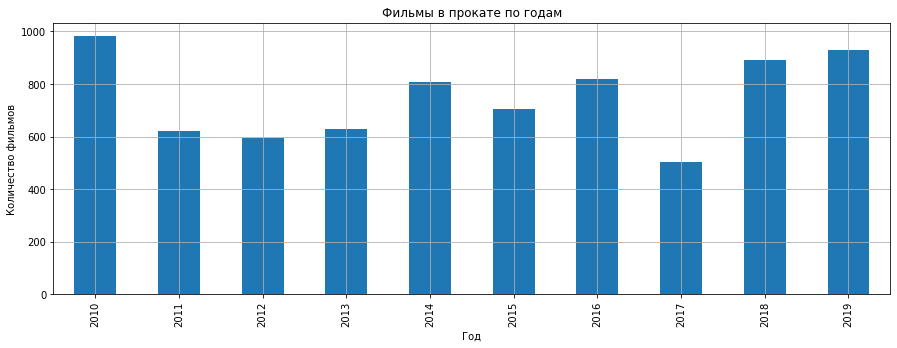

In [91]:
data_pivot = data.pivot_table(index='year', values='title', aggfunc =['count'])
data_pivot.plot(kind='bar', figsize=(15, 5), grid=True, legend=False)
plt.title("Фильмы в прокате по годам")
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.show()

На графике показано сколько фильмов выходило в прокат по годам.

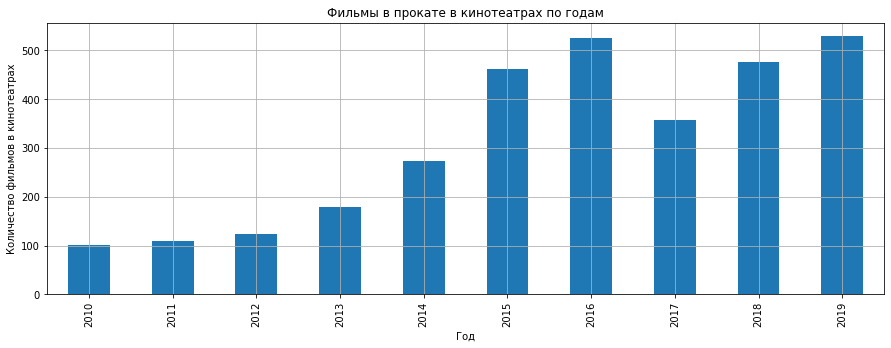

In [92]:
data_query= data.query('box_office > 0').pivot_table(index = 'year', values = 'box_office', aggfunc = 'count')
data_query.plot(kind='bar', figsize=(15, 5), grid=True, legend=False)
plt.title("Фильмы в прокате в кинотеатрах по годам")
plt.ylabel('Количество фильмов в кинотеатрах')
plt.xlabel('Год')
plt.show()

На графике показано сколько фильмов выходило в прокат в кинотеатрах по годам.

Соединим эти таблицы по столбцу year

In [93]:
pd.options.mode.chained_assignment = None
data_pivot_query = data_pivot.merge(data_query, on='year', how='left')

In [94]:
data_pivot_query

,"(count, title)",box_office
year,,
2010,984,101
2011,622,109
2012,593,123
2013,630,179
2014,807,273
2015,705,462
2016,818,525
2017,505,357
2018,891,475


Изменим названия столбцов на удобные

In [95]:
data_pivot_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2010 to 2019
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   (count, title)  10 non-null     int64
 1   box_office      10 non-null     int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [96]:
data_pivot_query.columns = ['_'.join(col).strip() for col in data_pivot_query.columns.values]
data_pivot_query=data_pivot_query.rename(columns= {'c___o___u___n___t_______t___i___t___l___e':'title_count','b_o_x___o_f_f_i_c_e':'box_office'} )
data_pivot_query

,count_title,box_office
year,,
2010,984,101
2011,622,109
2012,593,123
2013,630,179
2014,807,273
2015,705,462
2016,818,525
2017,505,357
2018,891,475


Посчитам долю фильмов в прокате в кинотеатрах от всего количества фильмов в прокате. Запишем значения в столбец share.

In [97]:
data_pivot_query['share'] =data_pivot_query['box_office'] / data_pivot_query['count_title']*100
data_pivot_query

,count_title,box_office,share
year,,,
2010,984,101,10.264228
2011,622,109,17.524116
2012,593,123,20.741990
2013,630,179,28.412698
2014,807,273,33.828996
2015,705,462,65.531915
2016,818,525,64.180929
2017,505,357,70.693069
2018,891,475,53.310887


Построим график размера доли фильмов в прокате в кинотеатрах по годам для наглядности.

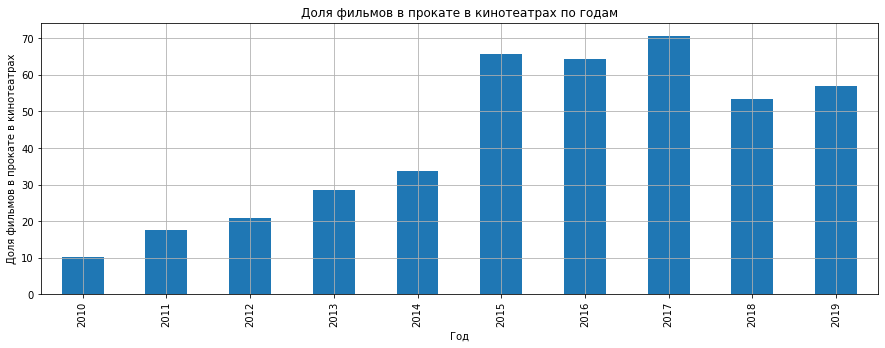

In [98]:
data_pivot_query_share=data_pivot_query.pivot_table(index = 'year', values = 'share')
data_pivot_query_share.plot(kind='bar', figsize=(15, 5), grid=True, legend=False)
plt.title("Доля фильмов в прокате в кинотеатрах по годам")
plt.ylabel('Доля фильмов в прокате в кинотеатрах')
plt.xlabel('Год')
plt.show()

Самая маленькое количество фильмов из всех, что вышли в прокат, показаных в кинотеатрах было в 2010 году, далее с каждым годом наблюдается рост этого показателя, который достигает максимума в 2017 году, в котором более 70 процентов вышедших в прокат фильмов было показано в кинотеатрах. После 2017 года идет спад до 53 процентов и опять подъем до 58.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

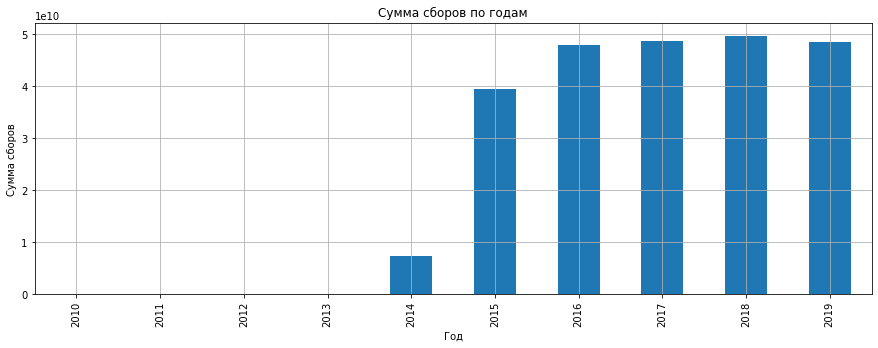

In [99]:
data_box_office= data.query('box_office > 0').pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum').plot(kind='bar', figsize=(15, 5), grid=True, legend=False)
plt.title("Сумма сборов по годам")
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.show()

In [100]:
data_box_office=data.groupby('year')['box_office'].sum()
data_box_office

year
2010    2.428654e+06
2011    1.410276e+07
2012    6.955423e+06
2013    2.979971e+07
2014    7.444952e+09
2015    3.949737e+10
2016    4.786630e+10
2017    4.856371e+10
2018    4.966840e+10
2019    4.842571e+10
Name: box_office, dtype: float64

До 2014 года сборы были настолько малы, что их даже не видно на графике. Но мы сгруппировали стоблец box_office по году и теперь можно оценить размер сборов. С 2014 года начинается их рост и с 2016 они сохраняются примерно на одном уровне в 49 млрд.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [101]:
data_box_office_mean_median = data.pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean', 'median'])
data_box_office_mean_median

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


Средняя и медианная сумма сборов сильно отличается по всем годам без исключений. Это нам говорит о том, что в каждом исследуемом году есть выбросы - аномально большие значения сборов по каким-то единичным фильмам, по сравнению с остальным большинством.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Отфильтруем данные по годам - с 2015 по 2019 и сделаем сводную таблицу со значениями года, возрастных органичений и суммы сборов.

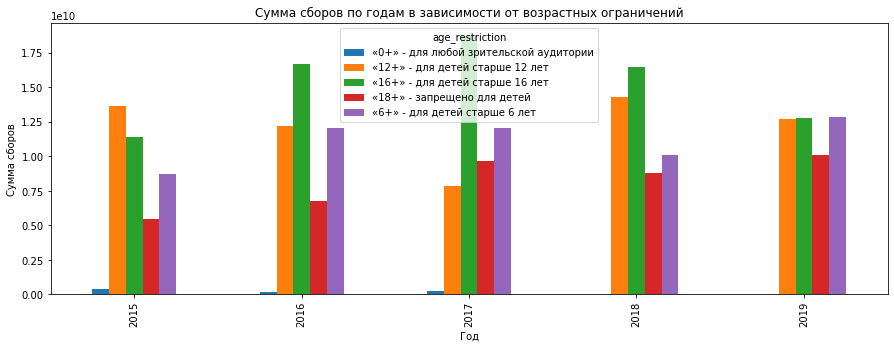

In [102]:
data_age=data.query('2015 <= year <= 2019').pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
data_age.plot(kind='bar', figsize=(15, 5))
plt.title("Сумма сборов по годам в зависимости от возрастных ограничений")
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.show()

Самые высокие суммы собирают фильмы с возрастными ограничениями 16+.  Далее идут фильмы 12+, 6+, 18+. Фильмы 0+, скорее всего это мультики, собирают меньше всех. 

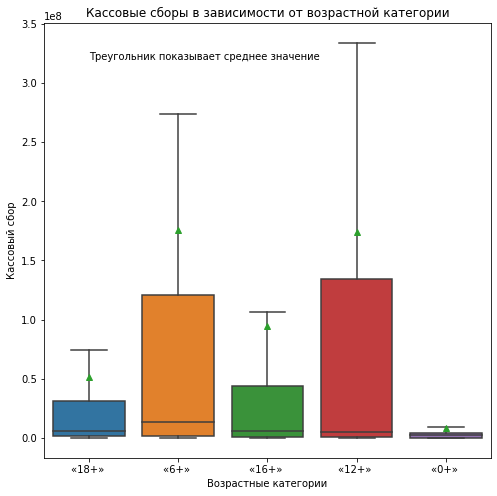

In [103]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для анализа фильмов, получивших государственную поддрежку, сделаем новый датафрейм с данными только о таких фильмах.

In [104]:
data_financing_source=data.query("financing_source != 'нет'").reset_index()
data_financing_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  332 non-null    int64              
 1   title                  332 non-null    object             
 2   pu_number              332 non-null    Int64              
 3   show_start_date        332 non-null    datetime64[ns, UTC]
 4   type                   332 non-null    object             
 5   film_studio            332 non-null    object             
 6   production_country     332 non-null    object             
 7   director               332 non-null    object             
 8   producer               332 non-null    object             
 9   age_restriction        332 non-null    object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64            

Создадим новый столбец total_support, в котором посчитаем размер гос поддержки по каждому фильму. Для этого суммируем столбцы refundable_support и nonrefundable_support

In [105]:
data_financing_source['total_support']= data_financing_source['refundable_support']+data_financing_source['nonrefundable_support']

In [106]:
data_financing_source

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,budget,financing_source,ratings,genres,box_office,year,first_director,first_genres,share_of_support,total_support
0,1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,33.370314,26500000.0
1,1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,...,37142857.0,Министерство культуры,NaN,жанр не указан,2.814000e+04,2014,А.Якимчук,жанр не указан,70.000000,26000000.0
2,1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,61.269064,107847945.0
3,1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,...,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.009473,28000000.0
4,1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,...,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,62.476381,25000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,...,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,51.020408,500000000.0
328,7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,...,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,52.631579,100000000.0
329,7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,...,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.966102,500000000.0
330,7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,...,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,64.999783,30000000.0


Посмотрим в каком размере выделяли господдержку на фильмы по годам

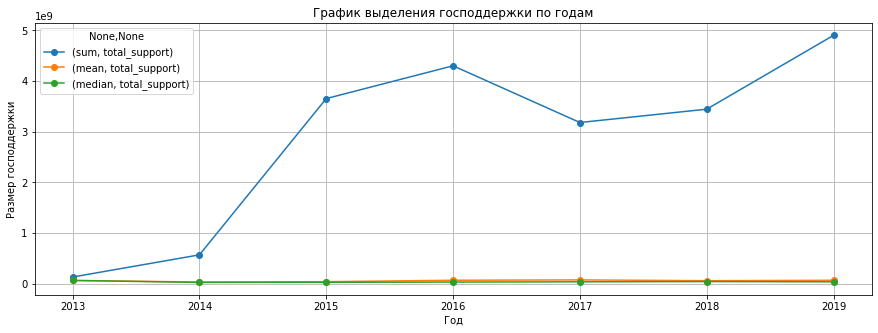

In [107]:
data_financing_source_total = data_financing_source.pivot_table(index = 'year', values = 'total_support', aggfunc = ['sum','mean','median']).plot(style='o-',grid=True, figsize=(15,5), title='График выделения господдержки по годам')
plt.ylabel('Размер господдержки')
plt.xlabel('Год')
plt.show()

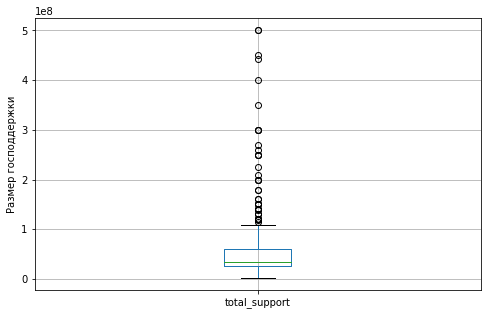

In [108]:
data_financing_source.boxplot('total_support', figsize=(8,5))
plt.ylabel('Размер господдержки')
plt.show()

In [109]:
data_financing_source.groupby('year').sum()

,index,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,share_of_support,total_support
year,,,,,,,,,
2013,2779,222009526,0.0,1.343479e+08,2.554354e+08,13.4,2.032239e+07,94.639378,1.343479e+08
2014,32453,1779196024,71000000.0,5.010023e+08,1.323939e+09,90.1,1.017422e+09,833.848098,5.720023e+08
2015,222748,9567869990,637153119.0,3.019088e+09,8.138838e+09,509.6,5.785285e+09,4543.418670,3.656241e+09
2016,202098,6886590476,921500000.0,3.381655e+09,7.859033e+09,323.6,6.081708e+09,3360.718184,4.303155e+09
2017,184937,4566203497,719346881.0,2.464625e+09,7.136460e+09,234.0,1.086508e+10,1978.983115,3.183972e+09
2018,334579,6240493702,662000000.0,2.784969e+09,7.326181e+09,318.1,9.934069e+09,2858.283144,3.446969e+09
2019,490592,7786784725,928000000.0,3.976000e+09,1.289077e+10,413.8,8.409627e+09,3507.318628,4.904000e+09


Мы видим, что значительный рост гос поддержки фильмов начался в 2014 году, он рос до 2016 года, далее наметился небольшой спад и достиг своего пика в 2019 год. Однако среднее значение и медиана остаюся примерно на одном уровне, значит рост был точечным, то есть была господдержка в крупных размерах на единичные фильмы.

In [110]:
data_financing_source['budget'].describe()

count    3.320000e+02
mean     1.353333e+08
std      1.883440e+08
min      1.159676e+07
25%      4.615397e+07
50%      7.500007e+07
75%      1.511720e+08
max      2.305074e+09
Name: budget, dtype: float64

Посмотрим на данные столбца budget

Добавим новый столбец payback, в котором посчитаем окупаемость фильмов с гос поддержкой.

In [111]:
data_financing_source['payback']=data_financing_source['box_office']-data_financing_source['budget']

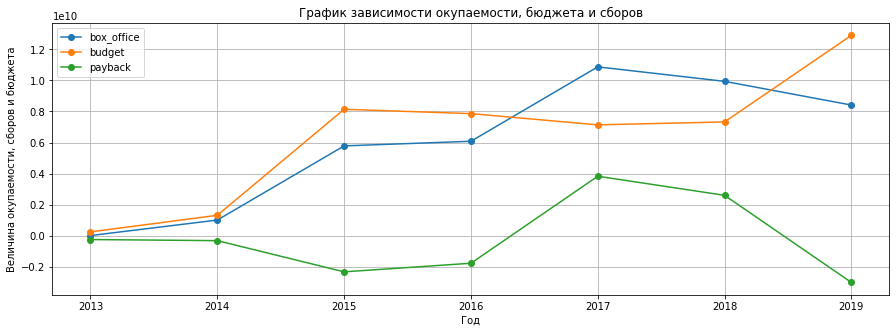

In [112]:
data_financing_source_budget=data_financing_source.pivot_table(index = 'year', values = ('box_office', 'budget','payback'), aggfunc = 'sum')
data_financing_source_budget.plot(style='o-',grid=True, figsize=(15,5), title='График зависимости окупаемости, бюджета и сборов')
plt.xlabel('Год')
plt.ylabel('Величина окупаемости, сборов и бюджета')
plt.show()

Большинство значений зеленой линии (окупаемости) ниже 0 нам говорит о том, что фильмы с государственной поддержкой довольно редко окупаются и окупаемость не зависит от бюджета или сборов.

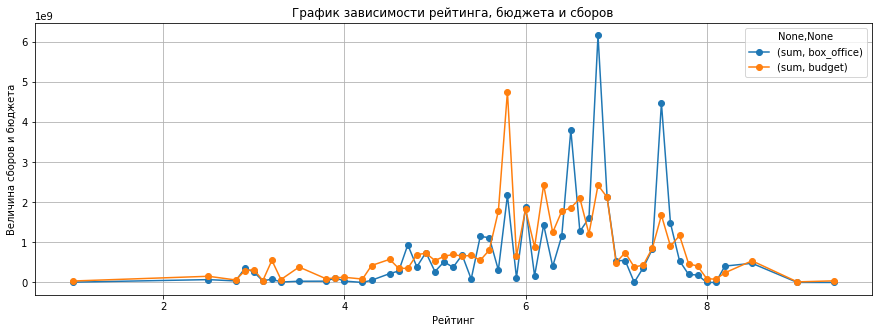

In [113]:
data_financing_source_rating=data_financing_source.pivot_table(index = 'ratings', values = ('box_office', 'budget'), aggfunc = ['sum'])
data_financing_source_rating.plot(style='o-',grid=True, figsize=(15,5), title='График зависимости рейтинга, бюджета и сборов')
plt.xlabel('Рейтинг')
plt.ylabel('Величина сборов и бюджета')
plt.show()

График нам показывает, что фильмы с более высоким рейтингом, примерно от 7.8 имели небольшой бюджет и сборы. Самые большие сборы собрали фильмы с рейтингом чуть менее 7, бюджет у которых был примерно 2,3, а сборы превысили 4, а фильмы с самым высоким бюджетом около 5, средними сборами 2,1 имели рейтинг около 6. Можно сделать вывод, что сумма бюджета не влияет на рейтинг, а так же и сумма сборов.

Проанализируем данные по жанрам. Посмотрим зависит ли окупаемость от жанра.

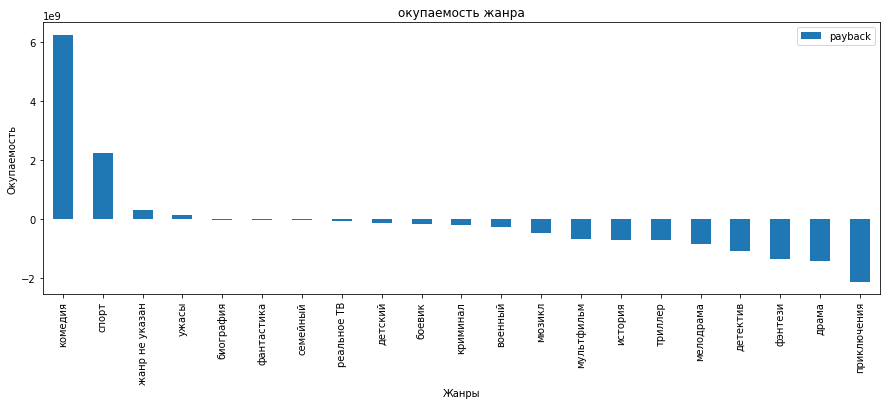

In [116]:
data_financing_source.groupby('first_genres').agg('sum').sort_values(by='payback',ascending=False).plot(title='окупаемость жанра',kind='bar',figsize=(15, 5), stacked=True, y = 'payback')
plt.xlabel('Жанры')
plt.ylabel('Окупаемость')
plt.show()

Мы видим, что наибольшего успеха добились фильмы в жанре комедии и спорт. Пожалуй, на этом все, так как еще один жанр - ужасы вышел на отметку больше 0. Особенно убыточными оказались приключения, драма, фэнтези.

Посмотрим на какие фильмы по жанрам выделялась господдержка.

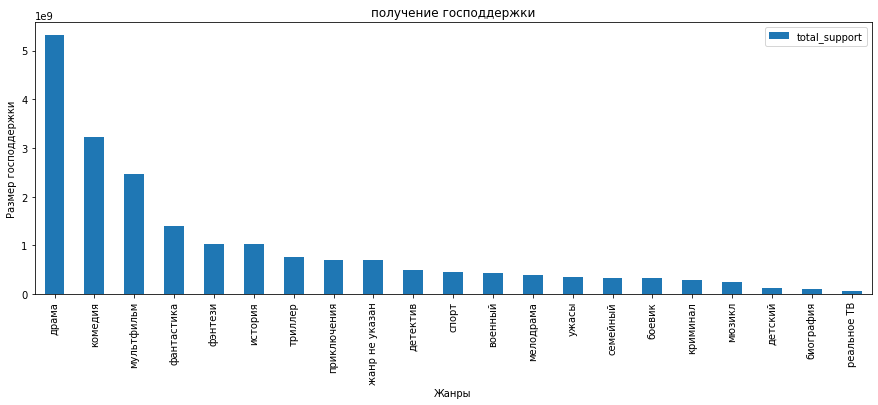

In [118]:
data_financing_source.groupby('first_genres').agg('sum').sort_values(by='total_support',ascending=False).plot(title='получение господдержки',kind='bar',figsize=(15, 5), stacked=True, y = 'total_support')
plt.xlabel('Жанры')
plt.ylabel('Размер господдержки')
plt.show()

На фильмы в жанре драма было выдело больше всего средств господдержки, однако, как мы видим на предыдущем графике, это жанр совсем себя не оправдал в части окупаемости. Чего нельзя сказать про комедию, она и господдержку получила и хорошие результаты по окупаемости показала. Спорт, пожалуй, еще и в лучшем положении, 

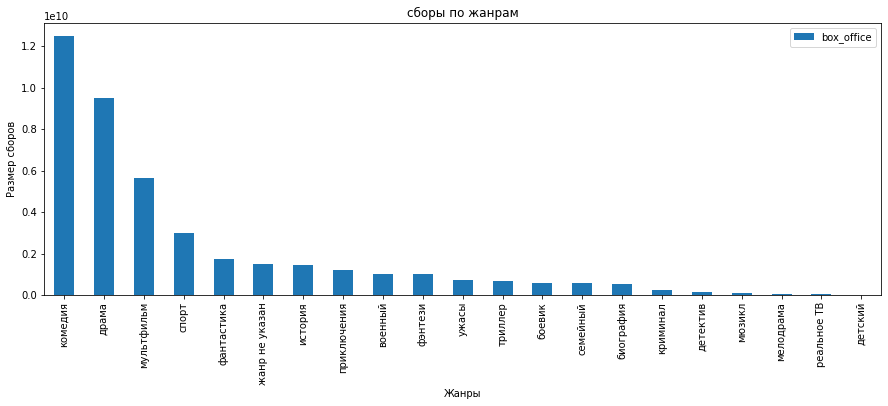

In [119]:
data_financing_source.groupby('first_genres').agg('sum').sort_values(by='box_office',ascending=False).plot(title='сборы по жанрам',kind='bar',figsize=(15, 5), stacked=True, y = 'box_office')
plt.xlabel('Жанры')
plt.ylabel('Размер сборов')
plt.show()

### Шаг 5. Напишите общий вывод

**На основе данных, опубликованных на портале открытых данных Министерства культуры, которые содержат информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск, мы изучили рынок российского кинопроката, уделив внимание фильмам, которые получили государственную поддержку.**
1. На первом этапе мы изучили предоставленные данные, соединили две таблицы данных по общему столбцу. Поработали на типами данных, привели к удобному формату, изучили пропуски, заполнили их в столбцах 'film_studio', 'production_country', 'director', 'producer', 'genres', 'refundable_support', 'nonrefundable_support', 'financing_source'.
2. Явных дубликатов не обнаружили, но обработали неявные дубликаты.
3. Изучили категориальные значения и поработали на ними, обнаружили общую для них проблему - данные туда вносились в произвольном формате,в одной строке перечислено несколько значений, много разных знаков. Такие данные трудно обрабатывать и анализировать.
4. Далее мы работали с количественными значениями, поискали аномалии в них, посчитали коэфициент зависимости размера господдержки от общего бюджета и заполнили нулевые значения в столбце budget.
5. Добавили новые столбцы - с информацией о годе проката 'year', с именем и фамилией главного режиссёра и основным жанром фильма 'first_director',	'first_genres'.
6. По окончании предобработки мы проверили, что в результате мы сохранили почти 100% от объема данных, что считаем отличным результатом.
7. Далее провели исследователький анализ данных, из которого можем сделать выводы:
- Больше всего фильмов в прокат вышло в 2010 году, далее был спад по количеству и с 2018 снова подъем. Из них в прокат в кинотеатрах в 2010 году вышло наименьшее количество фильмов, наибольшее в 2019, а наибольшая доля фильмов в прокате в кинотеатрах была в 2017 году.
- По результатам анализа влияния возрастного ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год, может отметить, что самые высокие суммы собирают фильмы с возрастными ограничениями 16+. Далее идут фильмы 12+, 6+, 18+. Фильмы 0+, скорее всего это мультики, собирают меньше всех.
8. Далее мы акцентировали наше внимание на фильмах с государственной поддержкой.
- Мы увидели,что значительный рост гос поддержки фильмов начался в 2014 году, он рос до 2016 года, далее наметился небольшой спад и достиг своего пика в 2019 год. Однако среднее значение и медиана оставались примерно на одном уровне, значит рост был точечным, то есть была господдержка в крупных размерах на единичные фильмы.
- Мы добавим новый столбец 'payback', в котором посчитали окупаемость фильмов с гос поддержкой и выяснили, что фильмы с государственной поддержкой довольно редко окупаются и окупаемость не зависит от бюджета или сборов. 
- Проанализировав рейтинг таких фильмов, сделали вывод, что фильмы с более высоким рейтингом, примерно от 7.8 имели небольшой бюджет и сборы. Самые большие сборы собрали фильмы с рейтингом чуть менее 7, бюджет у которых был примерно 2,3, а сборы превысили 4, а фильмы с самым высоким бюджетом около 5, средними сборами 2,1 имели рейтинг около 6. Следовательно - сумма бюджета не влияет на рейтинг, а так же и сумма сборов. 
- Проведя аналих по жанрам, отметили, что наибольшего успеха добились фильмы в жанре комедии и спорт, а особенно убыточными оказались приключения, фэнтези и драма, на которую было выделено больше всего господдержки.